In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Train Data exploration and visualization

In [60]:
df_train = pd.read_csv('train.csv')

In [84]:

df_train = df_train.loc[np.random.random_integers(0, len(df_train), 10000)]
len(df_train)

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(0, 404290 + 1) instead
  


10000

In [85]:
qids = pd.Series(df_train['qid1'].tolist()+df_train['qid2'].tolist())

In [86]:
qids.value_counts() # Question Number of times repeated

17811     5
28764     5
48712     5
69550     4
21693     4
61456     4
10472     4
30782     4
11477     4
17978     4
15063     4
1894      3
3857      3
21377     3
8119      3
37522     3
21821     3
18531     3
9703      3
14071     3
87924     3
10024     3
88034     3
52345     3
7800      3
10234     3
99019     3
18758     3
7975      3
18345     3
         ..
418966    1
126103    1
530014    1
101531    1
468110    1
537756    1
382112    1
449697    1
135414    1
91302     1
60583     1
218256    1
15501     1
27767     1
443522    1
267384    1
138361    1
109130    1
113789    1
175231    1
283776    1
230772    1
504972    1
517254    1
519303    1
405447    1
7305      1
159       1
199819    1
129358    1
Length: 19118, dtype: int64

In [87]:
unique_qid = set(qids)
unique_qsts = len(unique_qid)
qs_morethan_onetime= sum(qids.value_counts()>1)
qs_morethan_onetime

791

In [88]:
  df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
388786,388786,521222,521223,What does it mean to dream of suicide?,I dream of suicide what does it mean?,0
282244,282244,402153,402154,What is the price of devil's own in cafe coffe...,My Gmail has my IMEI number can u track it?,0
29849,29849,55188,55189,What is the important dates for SSC CGL (Tier-...,What is the date of SSC CGL tier 3 2016?,1
379761,379761,184539,511300,How do I lose 3kg weight in one week?,How do you lose the most weight in three weeks?,0
394432,394432,527320,527321,What do you think about movie Room?,What do you think of the 2003 independent roma...,1


In [89]:
#check how many questions with any null value
nan_count = df_train[df_train.isnull().any(1)]
nan_count

,id,qid1,qid2,question1,question2,is_duplicate


In [90]:
df_train[df_train.isnull().any(1)]
df_train = df_train.fillna('') #Fill null values with '' string

In [91]:
#Re-check how many questions with any null value
nan_count = df_train[df_train.isnull().any(1)]
nan_count #Finally the we found the question with no null values 

,id,qid1,qid2,question1,question2,is_duplicate


In [92]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 388786 to 24445
Data columns (total 6 columns):
id              10000 non-null int64
qid1            10000 non-null int64
qid2            10000 non-null int64
question1       10000 non-null object
question2       10000 non-null object
is_duplicate    10000 non-null int64
dtypes: int64(4), object(2)
memory usage: 546.9+ KB


In [93]:
df_train.groupby("is_duplicate")['id'].count() #count the number of 'duplicate' and 'non-duplicate' question

is_duplicate
0    6243
1    3757
Name: id, dtype: int64

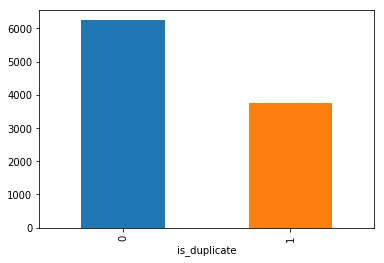

In [94]:
df_train.groupby("is_duplicate")['id'].count().plot.bar() #plot the graph for the above data

In [95]:
is_duplicate0 = len(df_train[df_train['is_duplicate']==0])
is_duplicate0/len(df_train)
print("Percentage of non-Duplicate Questions: %d percentage"%((is_duplicate0/len(df_train))*100))

Percentage of non-Duplicate Questions: 62 percentage


In [96]:
is_duplicate1 = len(df_train[df_train['is_duplicate']==1])
is_duplicate1/len(df_train)

print("Percentage of Duplicate Questions: %d percentage"%((is_duplicate1/len(df_train))*100))

Percentage of Duplicate Questions: 37 percentage


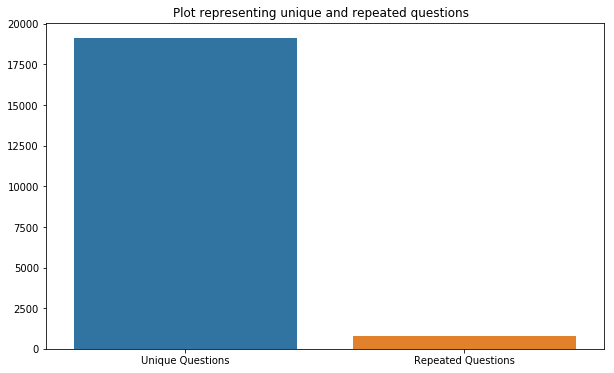

In [97]:
x = ["Unique Questions" , "Repeated Questions"]
y =  [unique_qsts , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

In [98]:
#Check whether there are any repeated pair of questions
pair_duplicates  = df_train[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print('Total Number of pair_duplicates groups: ',pair_duplicates.shape[0])
print('Total Number of row: ',df_train.shape[0]) #If both count are equal then there are no duplicates
print("Total duplicate pairs: ",(df_train.shape[0] - pair_duplicates.shape[0]))

Total Number of pair_duplicates groups:  9866
Total Number of row:  10000
Total duplicate pairs:  134


### Overall info about train Data

In [99]:
df_test = pd.read_csv('test.csv')

In [100]:
print('Total number of question pairs in training dataset: ', len(df_train))
print('total number of question pairs to predict is_duplicate: ', len(df_test))
print('Total number of unique questions in training dataset: ', len(unique_qid))
print("In Train dataset: ")
print('Total percentage of is_duplicate=0: ', round((is_duplicate0/(is_duplicate0+is_duplicate1))*100, 2), "%")
print('Total percentage of is_duplicate=1: ', round((is_duplicate1/(is_duplicate0+is_duplicate1))*100, 2), "%")

Total number of question pairs in training dataset:  10000
total number of question pairs to predict is_duplicate:  2345796
Total number of unique questions in training dataset:  19118
In Train dataset: 
Total percentage of is_duplicate=0:  62.43 %
Total percentage of is_duplicate=1:  37.57 %


###  Feature extraction 

1. **q1_len** = Length of Question-1
2. **q2_len** = Length of Question-2
3. **q1_no_words** = Number of words in Question-1
4. **q2_no_words** = Number of words in Question-2
5. **total_uni_words** = Total number of unique words in Question-1 and Question-2, Combine and find unique.
6. **common_words** = Total number of common words in both Question-1 and Question-2
7. **word_share** = Total number of words share(common_words/total_words)
8. **total_words** = Total number of words unique words in Question-1 and Question-2, find Unique in each and add them.

In [101]:
# def total_uni_words(row):
# #     print(row['question1'])
# df_train['total_uni_words'] = df_train.apply(total_uni_words, axis=1)

In [102]:
df_train['q1_len'] = df_train['question1'].str.len()
df_train['q2_len'] = df_train['question2'].str.len()
df_train['q1_no_words'] = df_train['question1'].apply(lambda x: len(x.split()))
df_train['q2_no_words'] = df_train['question2'].apply(lambda x: len(x.split()))
def total_uni_words(row):
    q1_w = row['question1'].lower().strip().split()
    q2_w = row['question2'].lower().strip().split()
    total_w = len(set(q1_w + q2_w))
    return total_w
df_train['total_uni_words'] = df_train.apply(total_uni_words, axis=1)
def total_words(row):
    q1_w = set(row['question1'].lower().strip().split())
    q2_w = set(row['question2'].lower().strip().split())
    total_w = len(q1_w)+ len(q2_w)
    return total_w

df_train['total_words'] = df_train.apply(total_words, axis=1)

def common_words(row):
    q1_w = set(row['question1'].lower().strip().split())
    q2_w = set(row['question2'].lower().strip().split())
    common_w = len(q1_w.intersection(q2_w)) #find common between two sets
#     x = set(["a","b","c","d"])
#     y = set(["c","d", 'f'])
#     print( y.intersection(x) )
#     outPut: {'c', 'd'}
    return common_w
df_train['common_words'] = df_train.apply(common_words, axis=1)   
def word_share(row):
    w_share = row['common_words']/row['total_words']
    return 1.0*w_share
    
df_train['word_share'] = df_train.apply(word_share, axis=1)   
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share
388786,388786,521222,521223,What does it mean to dream of suicide?,I dream of suicide what does it mean?,0,38,37,8,8,11,16,5,0.312500
282244,282244,402153,402154,What is the price of devil's own in cafe coffe...,My Gmail has my IMEI number can u track it?,0,52,43,11,10,20,20,0,0.000000
29849,29849,55188,55189,What is the important dates for SSC CGL (Tier-...,What is the date of SSC CGL tier 3 2016?,1,74,40,14,10,17,23,6,0.260870
379761,379761,184539,511300,How do I lose 3kg weight in one week?,How do you lose the most weight in three weeks?,0,37,47,9,10,14,19,5,0.263158
394432,394432,527320,527321,What do you think about movie Room?,What do you think of the 2003 independent roma...,1,35,67,7,12,13,18,5,0.277778


\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


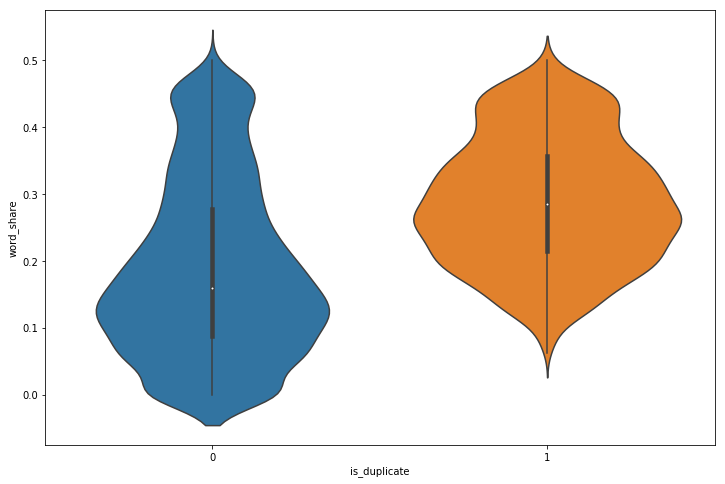

In [103]:
plt.figure(figsize=(12, 8))

sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df_train)

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


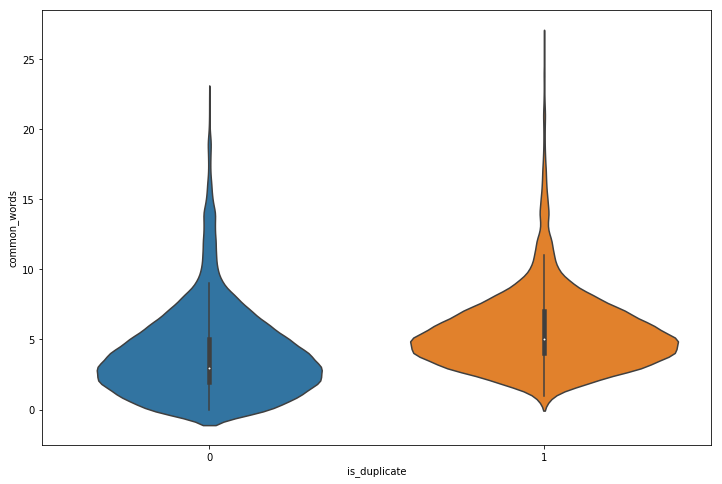

In [104]:
plt.figure(figsize=(12, 8))

sns.violinplot(x = 'is_duplicate', y = 'common_words', data = df_train)

\\cifs-ecs.cs.odu.edu\Grad\cmuthyal\win_user_profile\AppData\Python\Python36\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


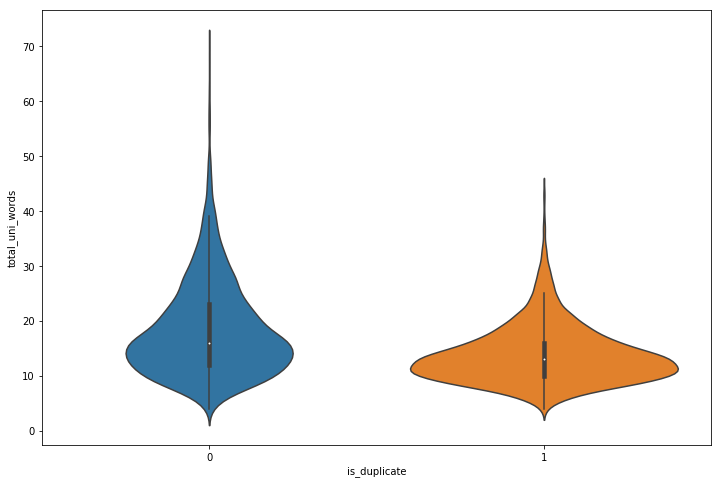

In [105]:
plt.figure(figsize=(12, 8))

sns.violinplot(x = 'is_duplicate', y = 'total_uni_words', data = df_train)

In [106]:
#Some Analysis of extracted feature

print("Shortest length of the question in Question-1: %d"%min(df_train['q1_no_words']))
print("Shortest length of the question in Question-2:  %d"%min(df_train['q2_no_words']))

Shortest length of the question in Question-1: 1
Shortest length of the question in Question-2:  2


In [107]:
df_train = df_train[df_train['q1_no_words']>0]
df_train = df_train[df_train['q2_no_words']>0]
print("Shortest length of the question in Question-1: %d"%min(df_train['q1_no_words']))
print("Shortest length of the question in Question-2:  %d"%min(df_train['q2_no_words']))

Shortest length of the question in Question-1: 1
Shortest length of the question in Question-2:  2


In [108]:
# Now find how many number of questions with min length
print("Total number of question with min length in Question-1: ",df_train[df_train['q1_no_words']==1].shape[0])
print("Total number of question with min length in Question-2: ",df_train[df_train['q2_no_words']==1].shape[0])

Total number of question with min length in Question-1:  4
Total number of question with min length in Question-2:  0


### PreProcessing the text

In [109]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
stop_words = stopwords.words("english")

In [110]:

def preProcess(x):
    x = str(x).lower()
    x = x.replace("won't", "will not")\
            .replace("cannot", "can not")\
            .replace("can't", "can not")\
            .replace("n't", " not")\
            .replace("what's", "what is")\
            .replace("it's", "it is")\
            .replace("i'm", "i am")\
            .replace("'re", " are")\
            .replace("%", " percent ")\
            .replace("€", " euro ")\
            .replace("'ll", " will")\
            .replace(",000,000", "m")\
            .replace(",000", "k")
#     x = re.sub(r"([0-9]+)000000", r"\1m", x)
#     x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    if type(x) == type(''):
        x = porter.stem(x)
        temp = BeautifulSoup(x)
        x = temp.get_text()
#     print(x)
    return x

In [111]:
df_train['question1'] = df_train["question1"].fillna("").apply(preProcess)

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [112]:
df_train['question1'].head()

388786               what does it mean to dream of suicide?
282244    what is the price of devil's own in cafe coffe...
29849     what is the important dates for ssc cgl (tier-...
379761                how do i lose 3kg weight in one week?
394432                  what do you think about movie room?
Name: question1, dtype: object

In [113]:
df_train['question2'] = df_train["question2"].fillna("").apply(preProcess)

C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\cmuthyal\AppData\Local\Continuum\anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [114]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share
388786,388786,521222,521223,what does it mean to dream of suicide?,i dream of suicide what does it mean?,0,38,37,8,8,11,16,5,0.312500
282244,282244,402153,402154,what is the price of devil's own in cafe coffe...,my gmail has my imei number can u track it?,0,52,43,11,10,20,20,0,0.000000
29849,29849,55188,55189,what is the important dates for ssc cgl (tier-...,what is the date of ssc cgl tier 3 2016?,1,74,40,14,10,17,23,6,0.260870
379761,379761,184539,511300,how do i lose 3kg weight in one week?,how do you lose the most weight in three weeks?,0,37,47,9,10,14,19,5,0.263158
394432,394432,527320,527321,what do you think about movie room?,what do you think of the 2003 independent roma...,1,35,67,7,12,13,18,5,0.277778


### Feature Extraction from fuzzywuzzy

In [115]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [53]:
'''
Definations

1. Simple Ratio: Compare two sequences and produce the ratio of those two
2. Partial Ratio: Find the max
3. Token Sort Ratio: The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string. 
4. Token Set Ratio: we tokenize both strings, but instead of immediately sorting and comparing, we split the tokens into two groups: intersection and remainder. We use those sets to build up a comparison string.
'''


'\nDefinations\n\n1. Simple Ratio: Compare two sequences and produce the ratio of those two\n2. Partial Ratio: Find the max\n3. Token Sort Ratio: The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string. \n4. Token Set Ratio: we tokenize both strings, but instead of immediately sorting and comparing, we split the tokens into two groups: intersection and remainder. We use those sets to build up a comparison string.\n'

In [54]:
def fuzzy_simple_ratio(row):
    temp_ratio = fuzz.ratio(row['question1'],row['question2'])
    return temp_ratio

In [55]:
def fuzzy_partial_ratio(row):
    temp_ratio = fuzz.partial_ratio(row['question1'],row['question2'])
    return temp_ratio

In [56]:
def fuzzy_token_sort_ratio(row):
    temp_ratio = fuzz.token_sort_ratio(row['question1'],row['question2'])
    return temp_ratio

In [57]:
def fuzzy_token_set_ratio(row):
    temp_ratio = fuzz.token_set_ratio(row['question1'],row['question2'])
    return temp_ratio

In [58]:
df_train['simple_ratio'] = df_train.apply(fuzzy_simple_ratio, axis=1)

In [117]:
df_train['partial_ratio'] = df_train.apply(fuzzy_partial_ratio, axis=1)

In [118]:
df_train['token_sort_ratio'] = df_train.apply(fuzzy_token_sort_ratio, axis=1)

In [119]:
df_train['token_set_ratio'] = df_train.apply(fuzzy_token_set_ratio, axis=1)

In [120]:
df_train.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_no_words,q2_no_words,total_uni_words,total_words,common_words,word_share,partial_ratio,token_sort_ratio,token_set_ratio
388786,388786,521222,521223,what does it mean to dream of suicide?,i dream of suicide what does it mean?,0,38,37,8,8,11,16,5,0.312500,64,93,97
282244,282244,402153,402154,what is the price of devil's own in cafe coffe...,my gmail has my imei number can u track it?,0,52,43,11,10,20,20,0,0.000000,39,34,36
29849,29849,55188,55189,what is the important dates for ssc cgl (tier-...,what is the date of ssc cgl tier 3 2016?,1,74,40,14,10,17,23,6,0.260870,68,65,89
379761,379761,184539,511300,how do i lose 3kg weight in one week?,how do you lose the most weight in three weeks?,0,37,47,9,10,14,19,5,0.263158,65,71,74
394432,394432,527320,527321,what do you think about movie room?,what do you think of the 2003 independent roma...,1,35,67,7,12,13,18,5,0.277778,63,55,79


### Analyzing the extracted features

In [121]:
df_duplicate = df_train[df_train['is_duplicate'] == 1]
df_non_duplicate = df_train[df_train['is_duplicate'] == 0]

In [122]:
duplicate_array = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
non_duplicate_array = np.dstack([df_non_duplicate["question1"], df_non_duplicate["question2"]]).flatten()

In [123]:
text_dulicate = " ".join(duplicate_array)
text_non_dulicate = " ".join(non_duplicate_array)

In [124]:
from wordcloud import WordCloud

Word Cloud for Duplicate Question pairs


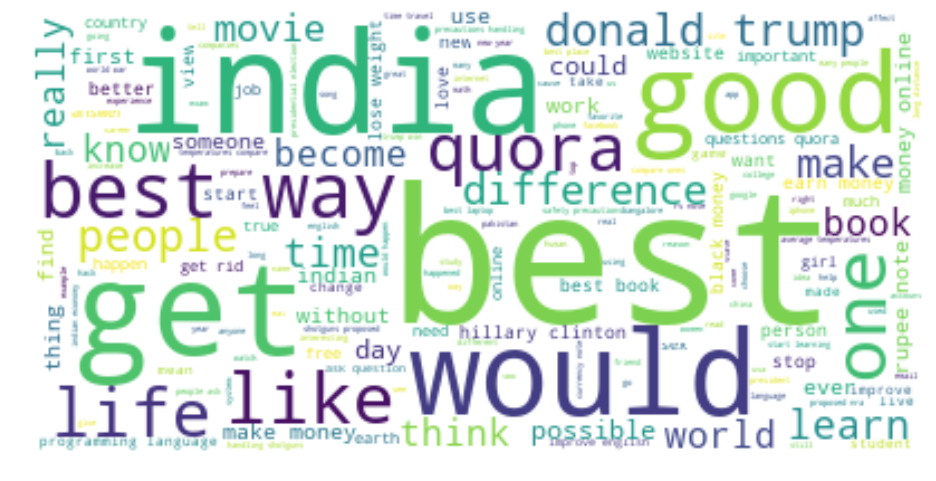

In [128]:
wc = WordCloud(background_color="white", max_words=len(text_dulicate), stopwords=stop_words)
wc.generate(text_dulicate)
print ("Word Cloud for Duplicate Question pairs")
plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Cloud for non Duplicate Question pairs


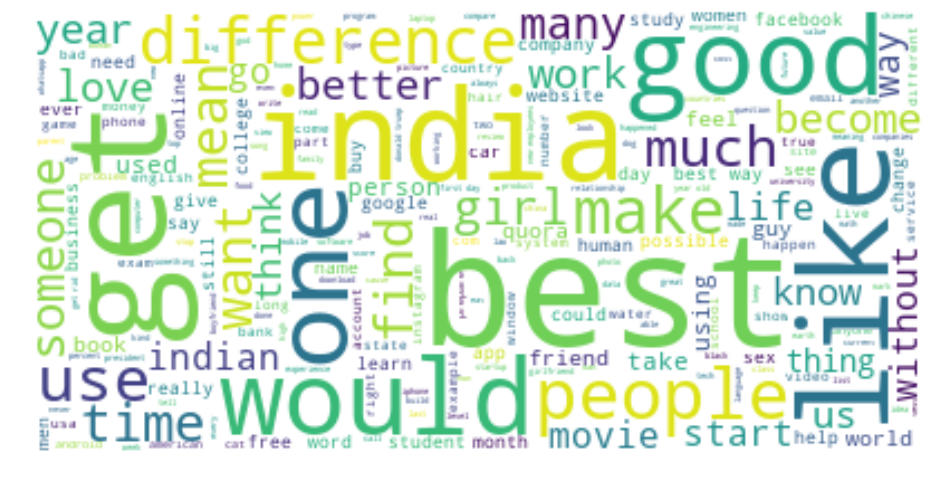

In [129]:
wc = WordCloud(background_color="white", max_words=len(text_non_dulicate), stopwords=stop_words)
wc.generate(text_non_dulicate)
print ("Word Cloud for non Duplicate Question pairs")
plt.figure(figsize=(16, 9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [130]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
XI, yi, test_size=0.1, random_state=42)